<a href="https://colab.research.google.com/github/MathMachado/DSWP/blob/master/Notebooks/Supervised%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning

![SupervisedLearning](https://github.com/MathMachado/Python_RFB/blob/DS_Python/Material/Supervised_X_Unsupervised.jpeg?raw=true)

Source: [Supervised vs Unsupervised Learning](https://www.linkedin.com/posts/asif-bhat_machinelearningalgorithms-machinelearing-activity-6576071130854055936-2mIn/)

## Leitura Complementar
https://scikit-learn.org/stable/

# Exemplo 1

## Carregar bibliotecas básicas

In [9]:
!pip install bamboolib

  Created wheel for bamboolib: filename=bamboolib-0.0.0-cp36-none-any.whl size=1251 sha256=e2fd7f8f01d0fedb5ca5197ade653079c49e2f77bc4b8fbe5435f09192a4c3b1
  Stored in directory: /root/.cache/pip/wheels/3a/d4/20/5f7ee98e67d8820e1a0b61d119c9a1858b874eda9ab3cc3128
Successfully built bamboolib


In [0]:
import numpy as np
np.set_printoptions(precision=2)

import pandas as pd
import bamboolib
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

## Carregar o dataframe

In [3]:
url= 'https://raw.githubusercontent.com/MathMachado/Python_RFB/DS_Python/Dataframes/FruitsDataWithColor.txt?token=AGDJQ66OKOVQC63ZVXGHMJ25P3M6G'
df_Fruits = pd.read_table(url)
df_Fruits.head(10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


## Definir as matrizes de dados X e y

In [0]:
l_feature_names_fruits = ['height', 'width', 'mass', 'color_score']
df_X_Fruits = df_Fruits[l_feature_names_fruits]
df_y_Fruits = df_Fruits['fruit_label']
l_target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

In [6]:
df_X_Fruits.head()

,height,width,mass,color_score
0,7.3,8.4,192,0.55
1,6.8,8.0,180,0.59
2,7.2,7.4,176,0.60
3,4.7,6.2,86,0.80
4,4.6,6.0,84,0.79


## Definir as amostras de treinamento e validação/teste

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(df_X_Fruits, df_y_Fruits, random_state = 20111974, test_size= 0.2)

## Aplica a transformação para que as features/variáveis tenham a mesma escala
* Neste caso, vamos aplicar a transformação MinMaxScaler()

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Devemos aplicar a transformação scaler no dataframe de validação
X_test_scaled = scaler.fit_transform(X_test)

## Treinar e testar o modelo

### k-NN

In [18]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

print(f'Treinamento - Acurácia do Classificador K-NN: {round(knn.score(X_train_scaled, y_train),2)}')
print(f'Validação   - Acurácia do Classificador K-NN: {round(knn.score(X_test_scaled, y_test),2)}')

Treinamento - Acurácia do Classificador K-NN: 0.98
Validação   - Acurácia do Classificador K-NN: 1.0


### Teste out-of-sample

In [19]:
# Considere um novo registro, dado por:
l_New_Fruit = [[5.5, 2.2, 10, 0.70]]
l_New_Fruit

[[5.5, 2.2, 10, 0.7]]

In [20]:
# Aplicar a transformação ao novo registro:
l_New_Fruit_Scaled = scaler.transform(l_New_Fruit)
l_New_Fruit_Scaled

array([[ 0.25, -0.95, -0.23,  0.04]])

### Predição

In [21]:
new_pred= l_target_names_fruits[knn.predict(l_New_Fruit_Scaled)[0]-1]
new_pred

'lemon'

# Exemplo 2 - Crime

## Carregar o dataframe

Fonte: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized


In [22]:
url= 'https://raw.githubusercontent.com/MathMachado/Python_RFB/DS_Python/Dataframes/Crime.txt?token=AGDJQ63JFBV5IXTFHIWDAE25QB4ZG'
df_Crime = pd.read_table(url, sep=',', na_values='?')
df_Crime.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,...,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.00,NaN,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.00,NaN,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.00,NaN,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,3217.7,3.31,NaN,NaN,NaN,NaN,0.00,NaN,0,0.00,10.0,57.86,10.0,57.86,33.0,190.93,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000.0,1328,2855,29.99,12.15,23.06,25.28,9.08,52.44,6.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5,974.2,0.38,NaN,NaN,NaN,NaN,0.00,NaN,0,0.00,NaN,NaN,4.0,32.04,14.0,112.14,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
5,Springfieldcity,MO,NaN,NaN,1,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,1.00,41.15,29.31,7.12,14.09,27705,11878,12029,7382,10264,10753,7192.0,8104,23223,17.78,8.76,23.03,20.66,5.72,59.02,14.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.4,1995.7,0.97,NaN,NaN,NaN,NaN,0.00,NaN,7,4.63,77.0,50.98,136.0,90.05,449.0,297.29,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.0,88.72,442.95,6867.42
6,Norwoodtown,MA,21.0,50250.0,1,28700,2.60,1.60,96.57,1.47,1.10,11.17,27.41,12.76,14.42,28700,100.0,42805,79.47,0.39,47.70,30.23,5.41,17.23,50394,18193,18276,17342,21482,12639,21852.0,22594,1126,4.01,4.49,13.89,27.01,4.85,65.42,14.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.9,2643.5,9.62,NaN,NaN,NaN,NaN,0.00,NaN,0,0.00,4.0,13.53,9.0,30.44,54.0,182.66,110.0,372.09,288.0,974.19,144.0,487

> **Exercício**: Quem são as variáveis de baixa relevância que não deveriam seguir para os passos seguintes?

In [0]:
# Remover features/variáveis de baixa relevância
l_Features_Keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145] 

In [24]:
df_Crime2 = df_Crime.iloc[l_Features_Keep].dropna()
df_Crime2.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,...,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
54,Toledocity,OH,95.0,77000.0,1,332943,2.54,19.70,76.96,1.05,3.97,14.78,28.65,14.52,12.25,332943,100.0,24819,71.86,0.36,36.37,28.93,12.29,18.44,30980,11894,13077,7722,9450,12415,7272.0,7817,62426,19.09,8.57,26.84,14.06,9.92,55.56,19.58,...,351211.0,108407.80,514.2,210.8,97.91,78.77,16.98,4.10,0.0,21.08,30.0,12.0,89.3,83.5,3988.5,3.00,222.0,41348280.0,80.67,5.0,4.39,127629.2,45,13.89,357.0,110.19,1594.0,492.02,1195.0,368.86,5502.0,1698.29,15251.0,4707.51,4517.0,1394.26,357.0,110.19,984.96,7910.25
55,Philadelphiacity,PA,101.0,60000.0,1,1585577,2.63,39.86,53.52,2.74,5.63,13.92,28.02,14.12,13.74,1585577,100.0,24603,70.12,0.35,32.15,31.63,13.98,18.20,30140,12091,15027,9061,10146,8285,5083.0,6053,313374,20.27,11.29,35.69,15.22,9.62,52.77,13.58,...,5480855.0,358261.41,840.2,426.4,79.54,73.48,23.18,2.84,0.0,25.95,273.0,14.0,39.9,140.0,11326.0,29.31,822.0,287578496.0,99.94,0.0,4.19,187978.5,439,28.70,785.0,51.31,11531.0,753.74,6821.0,445.86,15117.0,988.14,39181.0,2561.10,23785.0,1554.73,2282.0,149.17,1279.60,5253.14
58,Lynchburgcity,VA,680.0,47672.0,1,66049,2.63,26.41,72.45,0.76,0.72,17.79,29.84,18.19,14.33,66049,100.0,23726,72.25,0.63,39.06,35.02,7.54,17.20,30141,12657,14721,7200,12833,6139,8400.0,7231,9889,16.45,13.61,30.52,21.74,5.97,56.27,19.31,...,61164.0,91072.10,443.2,205.5,81.87,90.58,9.42,0.00,0.0,9.42,8.0,8.0,38.7,51.2,1290.5,3.33,62.0,5585480.0,89.13,0.0,5.80,83166.8,3,4.47,45.0,67.00,107.0,159.32,351.0,522.63,560.0,833.83,2316.0,3448.48,184.0,273.97,50.0,74.45,753.42,4630.73
99,NewHaventown,CT,9.0,52070.0,1,130474,2.66,36.14,53.85,2.41,13.22,17.06,34.55,19.17,10.81,130474,100.0,25811,73.04,0.47,37.07,26.28,14.61,12.75,31163,12968,16127,9616,7750,11739,7014.0,7420,25481,21.29,11.86,28.97,26.70,9.25,56.71,16.41,...,145000.0,121233.40,371.8,326.1,74.62,79.23,17.44,3.33,0.0,20.77,12.0,10.0,167.4,19.5,6679.9,9.54,100.0,17939552.0,89.74,5.0,3.08,149991.2,22,18.39,130.0,108.69,1238.0,1035.08,1154.0,964.85,3417.0,2856.93,7719.0,6453.80,1873.0,1566.00,134.0,112.04,2127.02,10988.76


O que fazer com as variáveis categóricas deste dataframe?

In [25]:
# Corrigir os nomes das features/variáveis
df_Crime2.columns= [cols.lower() for cols in df_Crime2.columns]
df_Crime2.head()

,communityname,state,countycode,communitycode,fold,population,householdsize,racepctblack,racepctwhite,racepctasian,racepcthisp,agepct12t21,agepct12t29,agepct16t24,agepct65up,numburban,pcturban,medincome,pctwwage,pctwfarmself,pctwinvinc,pctwsocsec,pctwpubasst,pctwretire,medfaminc,percapinc,whitepercap,blackpercap,indianpercap,asianpercap,otherpercap,hisppercap,numunderpov,pctpopunderpov,pctless9thgrade,pctnothsgrad,pctbsormore,pctunemployed,pctemploy,pctemplmanu,...,lemastotalreq,lemastotreqperpop,policreqperoffic,policperpop,racialmatchcommpol,pctpolicwhite,pctpolicblack,pctpolichisp,pctpolicasian,pctpolicminor,officassgndrugunits,numkindsdrugsseiz,policaveotworked,landarea,popdens,pctusepubtrans,policcars,policoperbudg,lemaspctpoliconpatr,lemasgangunitdeploy,lemaspctofficdrugun,policbudgperpop,murders,murdperpop,rapes,rapesperpop,robberies,robbbperpop,assaults,assaultperpop,burglaries,burglperpop,larcenies,larcperpop,autotheft,autotheftperpop,arsons,arsonsperpop,violentcrimesperpop,nonviolperpop
54,Toledocity,OH,95.0,77000.0,1,332943,2.54,19.70,76.96,1.05,3.97,14.78,28.65,14.52,12.25,332943,100.0,24819,71.86,0.36,36.37,28.93,12.29,18.44,30980,11894,13077,7722,9450,12415,7272.0,7817,62426,19.09,8.57,26.84,14.06,9.92,55.56,19.58,...,351211.0,108407.80,514.2,210.8,97.91,78.77,16.98,4.10,0.0,21.08,30.0,12.0,89.3,83.5,3988.5,3.00,222.0,41348280.0,80.67,5.0,4.39,127629.2,45,13.89,357.0,110.19,1594.0,492.02,1195.0,368.86,5502.0,1698.29,15251.0,4707.51,4517.0,1394.26,357.0,110.19,984.96,7910.25
55,Philadelphiacity,PA,101.0,60000.0,1,1585577,2.63,39.86,53.52,2.74,5.63,13.92,28.02,14.12,13.74,1585577,100.0,24603,70.12,0.35,32.15,31.63,13.98,18.20,30140,12091,15027,9061,10146,8285,5083.0,6053,313374,20.27,11.29,35.69,15.22,9.62,52.77,13.58,...,5480855.0,358261.41,840.2,426.4,79.54,73.48,23.18,2.84,0.0,25.95,273.0,14.0,39.9,140.0,11326.0,29.31,822.0,287578496.0,99.94,0.0,4.19,187978.5,439,28.70,785.0,51.31,11531.0,753.74,6821.0,445.86,15117.0,988.14,39181.0,2561.10,23785.0,1554.73,2282.0,149.17,1279.60,5253.14
58,Lynchburgcity,VA,680.0,47672.0,1,66049,2.63,26.41,72.45,0.76,0.72,17.79,29.84,18.19,14.33,66049,100.0,23726,72.25,0.63,39.06,35.02,7.54,17.20,30141,12657,14721,7200,12833,6139,8400.0,7231,9889,16.45,13.61,30.52,21.74,5.97,56.27,19.31,...,61164.0,91072.10,443.2,205.5,81.87,90.58,9.42,0.00,0.0,9.42,8.0,8.0,38.7,51.2,1290.5,3.33,62.0,5585480.0,89.13,0.0,5.80,83166.8,3,4.47,45.0,67.00,107.0,159.32,351.0,522.63,560.0,833.83,2316.0,3448.48,184.0,273.97,50.0,74.45,753.42,4630.73
99,NewHaventown,CT,9.0,52070.0,1,130474,2.66,36.14,53.85,2.41,13.22,17.06,34.55,19.17,10.81,130474,100.0,25811,73.04,0.47,37.07,26.28,14.61,12.75,31163,12968,16127,9616,7750,11739,7014.0,7420,25481,21.29,11.86,28.97,26.70,9.25,56.71,16.41,...,145000.0,121233.40,371.8,326.1,74.62,79.23,17.44,3.33,0.0,20.77,12.0,10.0,167.4,19.5,6679.9,9.54,100.0,17939552.0,89.74,5.0,3.08,149991.2,22,18.39,130.0,108.69,1238.0,1035.08,1154.0,964.85,3417.0,2856.93,7719.0,6453.80,1873.0,1566.00,134.0,112.04,2127.02,10988.76


In [0]:
# Dropar communityname e state para fazer funcionar
df_Crime2 = df_Crime2.drop(['communityname', 'state'], axis= 1)

In [0]:
df_X_Crime = df_Crime2.copy()

# A variável-target neste exemplo se chama 'violentcrimesperpop'
df_y_Crime = df_X_Crime['violentcrimesperpop']
df_X_Crime = df_X_Crime.drop(['violentcrimesperpop'], axis= 1)

In [30]:
df_y_Crime

54     984.96
55    1279.60
58     753.42
99    2127.02
Name: violentcrimesperpop, dtype: float64

## Regressão Linear

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X_Crime, df_y_Crime,
                                                   random_state = 20111974)
linreg = LinearRegression().fit(X_train, y_train)

In [32]:
print(f'Modelo Linear com intercepto= {linreg.intercept_}')

Modelo Linear com intercepto= -194.2443883651854


In [33]:
print(f'Coeficientes:\n{linreg.coef_}')

Coeficientes:
[-1.82e-05 -2.23e-04  0.00e+00 -1.08e-03  2.38e-09  4.69e-07 -7.84e-07
  6.03e-08  4.43e-07  1.20e-08  1.99e-07  8.74e-08 -1.09e-07 -1.08e-03
  0.00e+00  6.64e-05  3.60e-08 -2.60e-09 -4.13e-08 -2.58e-07  2.11e-07
 -1.90e-07  2.85e-05  2.23e-05  7.68e-05  8.70e-05 -1.52e-04  1.33e-04
 -3.88e-05 -5.22e-07 -9.94e-05  1.53e-07 -3.52e-10 -1.08e-08  2.96e-07
  7.45e-08  2.67e-08 -1.16e-07  3.01e-07 -8.34e-08  1.62e-07  3.91e-09
  6.24e-07  2.62e-08  1.44e-08  4.99e-09 -7.04e-07 -8.09e-07 -5.99e-07
 -9.12e-07 -4.36e-07 -3.92e-07  2.17e-04  3.56e-07  2.61e-04 -1.21e-07
 -2.52e-07 -1.36e-07  2.42e-08  5.46e-08  7.03e-08  8.97e-08  1.12e-07
 -6.30e-07  1.33e-07  9.93e-08  4.44e-08 -7.00e-10  3.44e-09  2.56e-09
 -1.06e-06  1.18e-07  7.87e-07 -3.89e-08 -7.01e-06 -6.33e-08 -1.06e-06
  1.07e-07 -4.02e-07 -5.40e-07  3.91e-08  7.11e-09  2.87e-03  3.53e-03
  4.39e-03  1.53e-03  5.53e-06  8.17e-06  9.21e-06  3.68e-06  8.21e-06
  1.73e-07  2.55e-07  7.20e-08  4.76e-05  4.61e-07  2.37e-07 -7

In [34]:
print(f'R-squared Score (treinamento): {linreg.score(X_train, y_train)}')

R-squared Score (treinamento): 1.0


In [0]:
print(f'R-squared Score (test): {linreg.score(X_test, y_test)}')

R-squared Score (test): nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Regressão Ridge

In [0]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(df_X_Crime, df_y_Crime, random_state = 20111974)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

In [0]:
print(f'Regressão Linear Ridge com Intercepto= : {linridge.intercept_}')

Regressão Linear Ridge com Intercepto= : -194.24438696520588


In [0]:
print(f'Regressão Linear Ridge com Coeficientes= :\n{linridge.coef_}')

Regressão Linear Ridge com Coeficientes= :
[-1.82e-05 -2.23e-04  0.00e+00 -1.08e-03  2.38e-09  4.69e-07 -7.84e-07
  6.03e-08  4.43e-07  1.20e-08  1.99e-07  8.74e-08 -1.09e-07 -1.08e-03
  0.00e+00  6.64e-05  3.60e-08 -2.60e-09 -4.13e-08 -2.58e-07  2.11e-07
 -1.90e-07  2.85e-05  2.23e-05  7.68e-05  8.70e-05 -1.52e-04  1.33e-04
 -3.88e-05 -5.22e-07 -9.94e-05  1.53e-07 -3.52e-10 -1.08e-08  2.96e-07
  7.45e-08  2.67e-08 -1.16e-07  3.01e-07 -8.34e-08  1.62e-07  3.91e-09
  6.24e-07  2.62e-08  1.44e-08  4.99e-09 -7.04e-07 -8.09e-07 -5.99e-07
 -9.12e-07 -4.36e-07 -3.92e-07  2.17e-04  3.56e-07  2.61e-04 -1.21e-07
 -2.52e-07 -1.36e-07  2.42e-08  5.46e-08  7.03e-08  8.97e-08  1.12e-07
 -6.30e-07  1.33e-07  9.93e-08  4.44e-08 -7.00e-10  3.44e-09  2.56e-09
 -1.06e-06  1.18e-07  7.87e-07 -3.89e-08 -7.01e-06 -6.33e-08 -1.06e-06
  1.07e-07 -4.02e-07 -5.40e-07  3.91e-08  7.11e-09  2.87e-03  3.53e-03
  4.39e-03  1.53e-03  5.53e-06  8.17e-06  9.21e-06  3.68e-06  8.21e-06
  1.73e-07  2.55e-07  7.20e-08  4.

In [0]:
print(f'R-squared Score (treinamento): {linridge.score(X_train, y_train)}')

R-squared Score (treinamento): 1.0


In [0]:
print(f'R-squared Score (test): {linridge.score(X_test, y_test)}')

R-squared Score (test): nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Regressão Ridge com Normalização

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(df_X_Crime, df_y_Crime, random_state = 20111974)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

In [0]:
print(f'Regressão Linear Ridge com intercepto= : {linridge.intercept_}')

Regressão Linear Ridge com intercepto= : 1111.5710150328928


In [0]:
print(f'Coeficientes:\n{linridge.coef_}')

Coeficientes:
[ -8.31  -3.26   0.    -2.09   7.1    9.71 -11.34  11.92  11.48   2.08
  11.29   6.8   -9.76  -2.09   0.    10.11  10.3   -2.42  -4.3   -9.21
   9.34 -11.16   8.57   7.4    8.71  11.71  -9.38   6.26  -8.61  -1.05
  -1.38  10.     0.73  -0.22   8.19   5.47   8.11 -12.18   9.62  -6.71
   7.99  -0.22  12.65   2.73   1.25   8.51 -12.45 -12.64 -12.53 -11.94
 -10.48 -10.27   4.71  12.76   8.39  -2.71  -4.55  -2.26   1.35  12.75
  12.71  12.61  12.51 -11.74  12.18  10.1    9.31  -2.85   8.04   8.79
 -12.1   12.63  12.82 -12.83  -1.01 -12.1  -12.18   3.12  -8.84 -10.08
   6.91  11.53  12.39  12.19  12.08  11.55  11.78  12.49  12.57  11.47
  12.08  10.38  12.75   9.9   11.98   8.94  11.95 -10.78  -9.99  -2.06
  -8.15   0.74  12.6    1.62  12.01  -1.48   9.85  -9.02  12.6   -7.57
  -7.14   7.94   5.23   0.     7.3   -2.85   1.23  10.79  -8.97  10.23
  12.44  -2.14  -0.76   5.7    7.64 -10.14   9.38   0.62   9.32  -1.69
   7.2    4.57  10.86   7.02  10.86   2.23  10.61   0.17  10.66

In [0]:
print(f'R-Squared Score (treinamento): {linridge.score(X_train_scaled, y_train)}')

R-Squared Score (treinamento): 0.9075956415374328


In [0]:
print(f'R-Squared Score (test): {linridge.score(X_test_scaled, y_test)}')

R-Squared Score (test): nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Regressão LASSO

In [0]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(df_X_Crime, df_y_Crime, random_state = 20111974)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

In [0]:
print(f'Regressão Linear LASSO com intercepto: {linlasso.intercept_}')

Regressão Linear LASSO com intercepto: 971.6995991125596


In [0]:
print(f'Coeficientes:\n{linlasso.coef_}')

Coeficientes:
[  -0.      0.      0.      0.      0.      0.     -0.   1060.98    0.
   -0.      0.      0.     -0.      0.      0.      0.      0.     -0.
   -0.     -0.      0.     -0.      0.      0.      0.     32.2    -0.
    0.     -0.      0.      0.      0.     -0.     -0.      0.      0.
    0.     -0.      0.     -0.      0.      0.      0.      0.      0.
   20.8  -186.2   -23.56   -0.     -0.     -0.     -0.      0.     23.53
    0.     -0.     -0.     -0.     -0.      0.      0.      0.      0.
   -0.      0.      0.      0.      0.      0.      0.     -0.      0.
   11.8    -2.55    0.     -0.     -0.      0.     -0.     -0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.     -0.     -0.
    0.     -0.      0.      0.      0.      0.      0.      0.     -0.
    0.     -0.     -0.      0.      0.      0.      0.      0.      0.
    0.     -0.      0.      0.      0.      0.      0.      0

In [0]:
print(f'R-Squared Score (treinamento): {linlasso.score(X_train_scaled, y_train)}')

R-Squared Score (treinamento): 0.9999338639964901


In [0]:
print(f'R-Squared Score (test): {linlasso.score(X_test_scaled, y_test)}')

R-Squared Score (test): nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [0]:
print('Features com não-zero weight (ordenado por magnitude absoluta):')
for e in sorted (list(zip(list(df_X_Crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features com não-zero weight (ordenado por magnitude absoluta):
	racepctasian, 1060.984
	pctfam2par, -186.203
	blackpercap, 32.204
	pctkids2par, -23.562
	pctkidsbornnevermar, 23.535
	persperfam, 20.798
	pcthousless3br, 11.799
	mednumbr, -2.554


### LASSO com Regularization
* Aqui, vamos avaliar o efeito no parâmetro alpha.

In [0]:
for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Alpha = 0.50
Features kept: 10, r-squared training: 1.00, r-squared test: nan

Alpha = 1.00
Features kept: 10, r-squared training: 1.00, r-squared test: nan

Alpha = 2.00
Features kept: 8, r-squared training: 1.00, r-squared test: nan

Alpha = 3.00
Features kept: 8, r-squared training: 1.00, r-squared test: nan

Alpha = 5.00
Features kept: 8, r-squared training: 1.00, r-squared test: nan

Alpha = 10.00
Features kept: 7, r-squared training: 1.00, r-squared test: nan

Alpha = 20.00
Features kept: 6, r-squared training: 0.99, r-squared test: nan

Alpha = 50.00
Features kept: 6, r-squared training: 0.96, r-squared test: nan



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarn

# Exemplo 3 - Predict Breast Cancer

In [35]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_Cancer= cancer['data']
y_Cancer= cancer['target']

df_Cancer = pd.DataFrame(np.c_[X_Cancer, y_Cancer], columns= np.append(cancer['feature_names'], ['target']))
df_Cancer['target'] = df_Cancer['target'].map({0: 'malign', 1: 'benign'})
df_Cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malign


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Cancer, y_Cancer, random_state = 20111974)

## LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
print(f'Acurácia do Classificador Regressão Logística')
print(f'Treinamento: {clf.score(X_train, y_train)}')
print(f'Validação..: {clf.score(X_test, y_test)}')

Acurácia do Classificador Regressão Logística
Treinamento: 0.9530516431924883
Validação..: 0.951048951048951


## LinearSVC

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Cancer, y_Cancer, random_state = 20111974)

In [40]:
# Treinamento
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train, y_train)

print(f'Acurácia do Classificador LinearSVC')
print(f'Treinamento: {clf.score(X_train, y_train)}')
print(f'Validação..: {clf.score(X_test, y_test)}')

Acurácia do Classificador LinearSVC
Treinamento: 0.7699530516431925
Validação..: 0.7412587412587412


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## SVM - Features não-normalizado

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Cancer, y_Cancer, random_state = 20111974)

In [49]:
from sklearn.svm import SVC
clf = SVC(C=10).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [50]:
print(f'Dataframe: Breast Cancer (Features não-normalizadas)')
print(f'Acurácia do RBF-kernel SVC')
print(f'Treinamento: {clf.score(X_train, y_train)}')
print(f'Validação: {clf.score(X_test, y_test)}')

Dataframe: Breast Cancer (Features não-normalizadas)
Acurácia do RBF-kernel SVC
Treinamento: 1.0
Validação: 0.6223776223776224


## SVM - Features Normalizadas

![Cross-Validation](https://github.com/MathMachado/Python_RFB/blob/DS_Python/Material/Cross-Validation.png?raw=true)

Fonte: [3.1. Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do algoritmo
clf = SVC(C=10).fit(X_train_scaled, y_train)

# Cross-Validation
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)#default cv=3
print(f'CV-Score (10-fold): {cv_scores}')
print(f'Média do CV-Score: {np.mean(cv_scores)}')

CV-Score (10-fold): [0.91 0.98 1.   0.98 0.95 1.   0.95 0.98 0.95 0.93]
Média do CV-Score: 0.9622234826999433


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [56]:
print(f'Dataframe: Breast Cancer (Features Normalizadas)')
print(f'Acurácia do RBF-kernel SVC com MinMax scaling)')
print(f'Treinamento: {clf.score(X_train_scaled, y_train)}')
print(f'Validação..: {clf.score(X_test_scaled, y_test)}')

Dataframe: Breast Cancer (Features Normalizadas)
Acurácia do RBF-kernel SVC com MinMax scaling)
Treinamento: 0.9765258215962441
Validação..: 0.9790209790209791


## GaussianNB

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Cancer, y_Cancer, random_state = 0)

from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_Cancer, y_Cancer, random_state = 0)# por default test=0.25

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Gradient Boosting Decision Tree

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_Cancer, y_Cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


## Multi Layer Perceptron

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_Cancer, y_Cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


# Exemplo 4 - Iris 
> compare a acurácia dos algoritmos abaixo, considerando uma amostra com features não-normalizadas e uma outra com features normalizadas e discuta os resultados.
* Usando:
    * Decision Tree
    * Random Forest
    * Logistic Regression
    * K-NN
    * Naive Bayes

In [0]:
def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)


In [0]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor

iris = load_iris()
X= iris.data
y= iris.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 20111974)
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [0]:
print(f'Acurácia do DecisionTreeClassifier')
print(f'Treinamento: {clf.score(X_train, y_train)}')
print(f'Validação..: {clf.score(X_test, y_test)}')

Acurácia do DecisionTreeClassifier
Treinamento: 1.0
Validação..: 0.9473684210526315


In [0]:
# Definindo max_depth para evitar overfitting
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print(f'Acurácia do DecisionTreeClassifier')
print(f'Treinamento: {clf2.score(X_train, y_train)}')
print(f'Validação..: {clf2.score(X_test, y_test)}')

Acurácia do DecisionTreeClassifier
Treinamento: 0.9821428571428571
Validação..: 0.8947368421052632


In [0]:
# k-NN
from sklearn.neighbors import KNeighborsRegressor
clf3 = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(f'Acurácia do KNeighborsRegressor')
print(f'Treinamento: {clf3.score(X_train, y_train)}')
print(f'Validação..: {clf3.score(X_test, y_test)}')

Acurácia do KNeighborsRegressor
Treinamento: 0.9655779816513761
Validação..: 0.9406829268292682


In [0]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt').fit(X_train, y_train)


print(f'Acurácia do RandomForestClassifier')
print(f'Treinamento: {clf4.score(X_train, y_train)}')
print(f'Validação..: {clf4.score(X_test, y_test)}')

Acurácia do RandomForestClassifier
Treinamento: 1.0
Validação..: 0.9736842105263158


In [0]:
# Random Forest Features Importance
fi = pd.DataFrame({'feature': list(iris.feature_names),
                   'importance': clf4.feature_importances_}).\
                    sort_values('importance', ascending = False)

fi

,feature,importance
2,petal length (cm),0.450991
3,petal width (cm),0.427159
0,sepal length (cm),0.105145
1,sepal width (cm),0.016704


TypeError: ignored

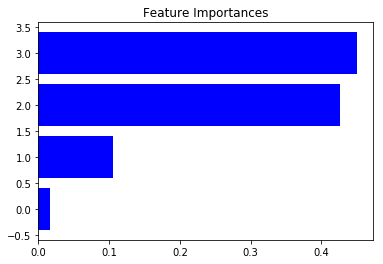

In [0]:
importances = clf4.feature_importances_
indices = np.argsort(importances)
features = iris.feature_names

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

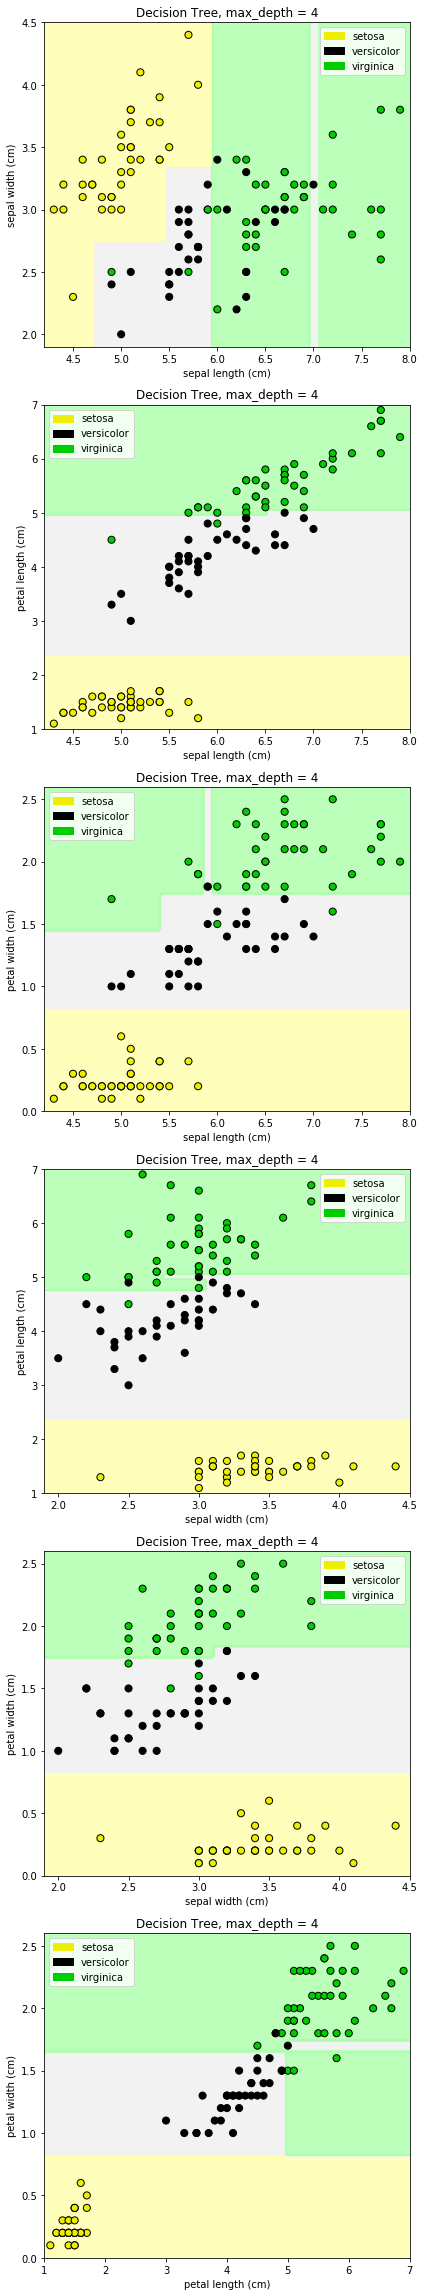

In [0]:
# Feature importance - Vamos utilizar para Feature Selection
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

## Visualizar o resultado

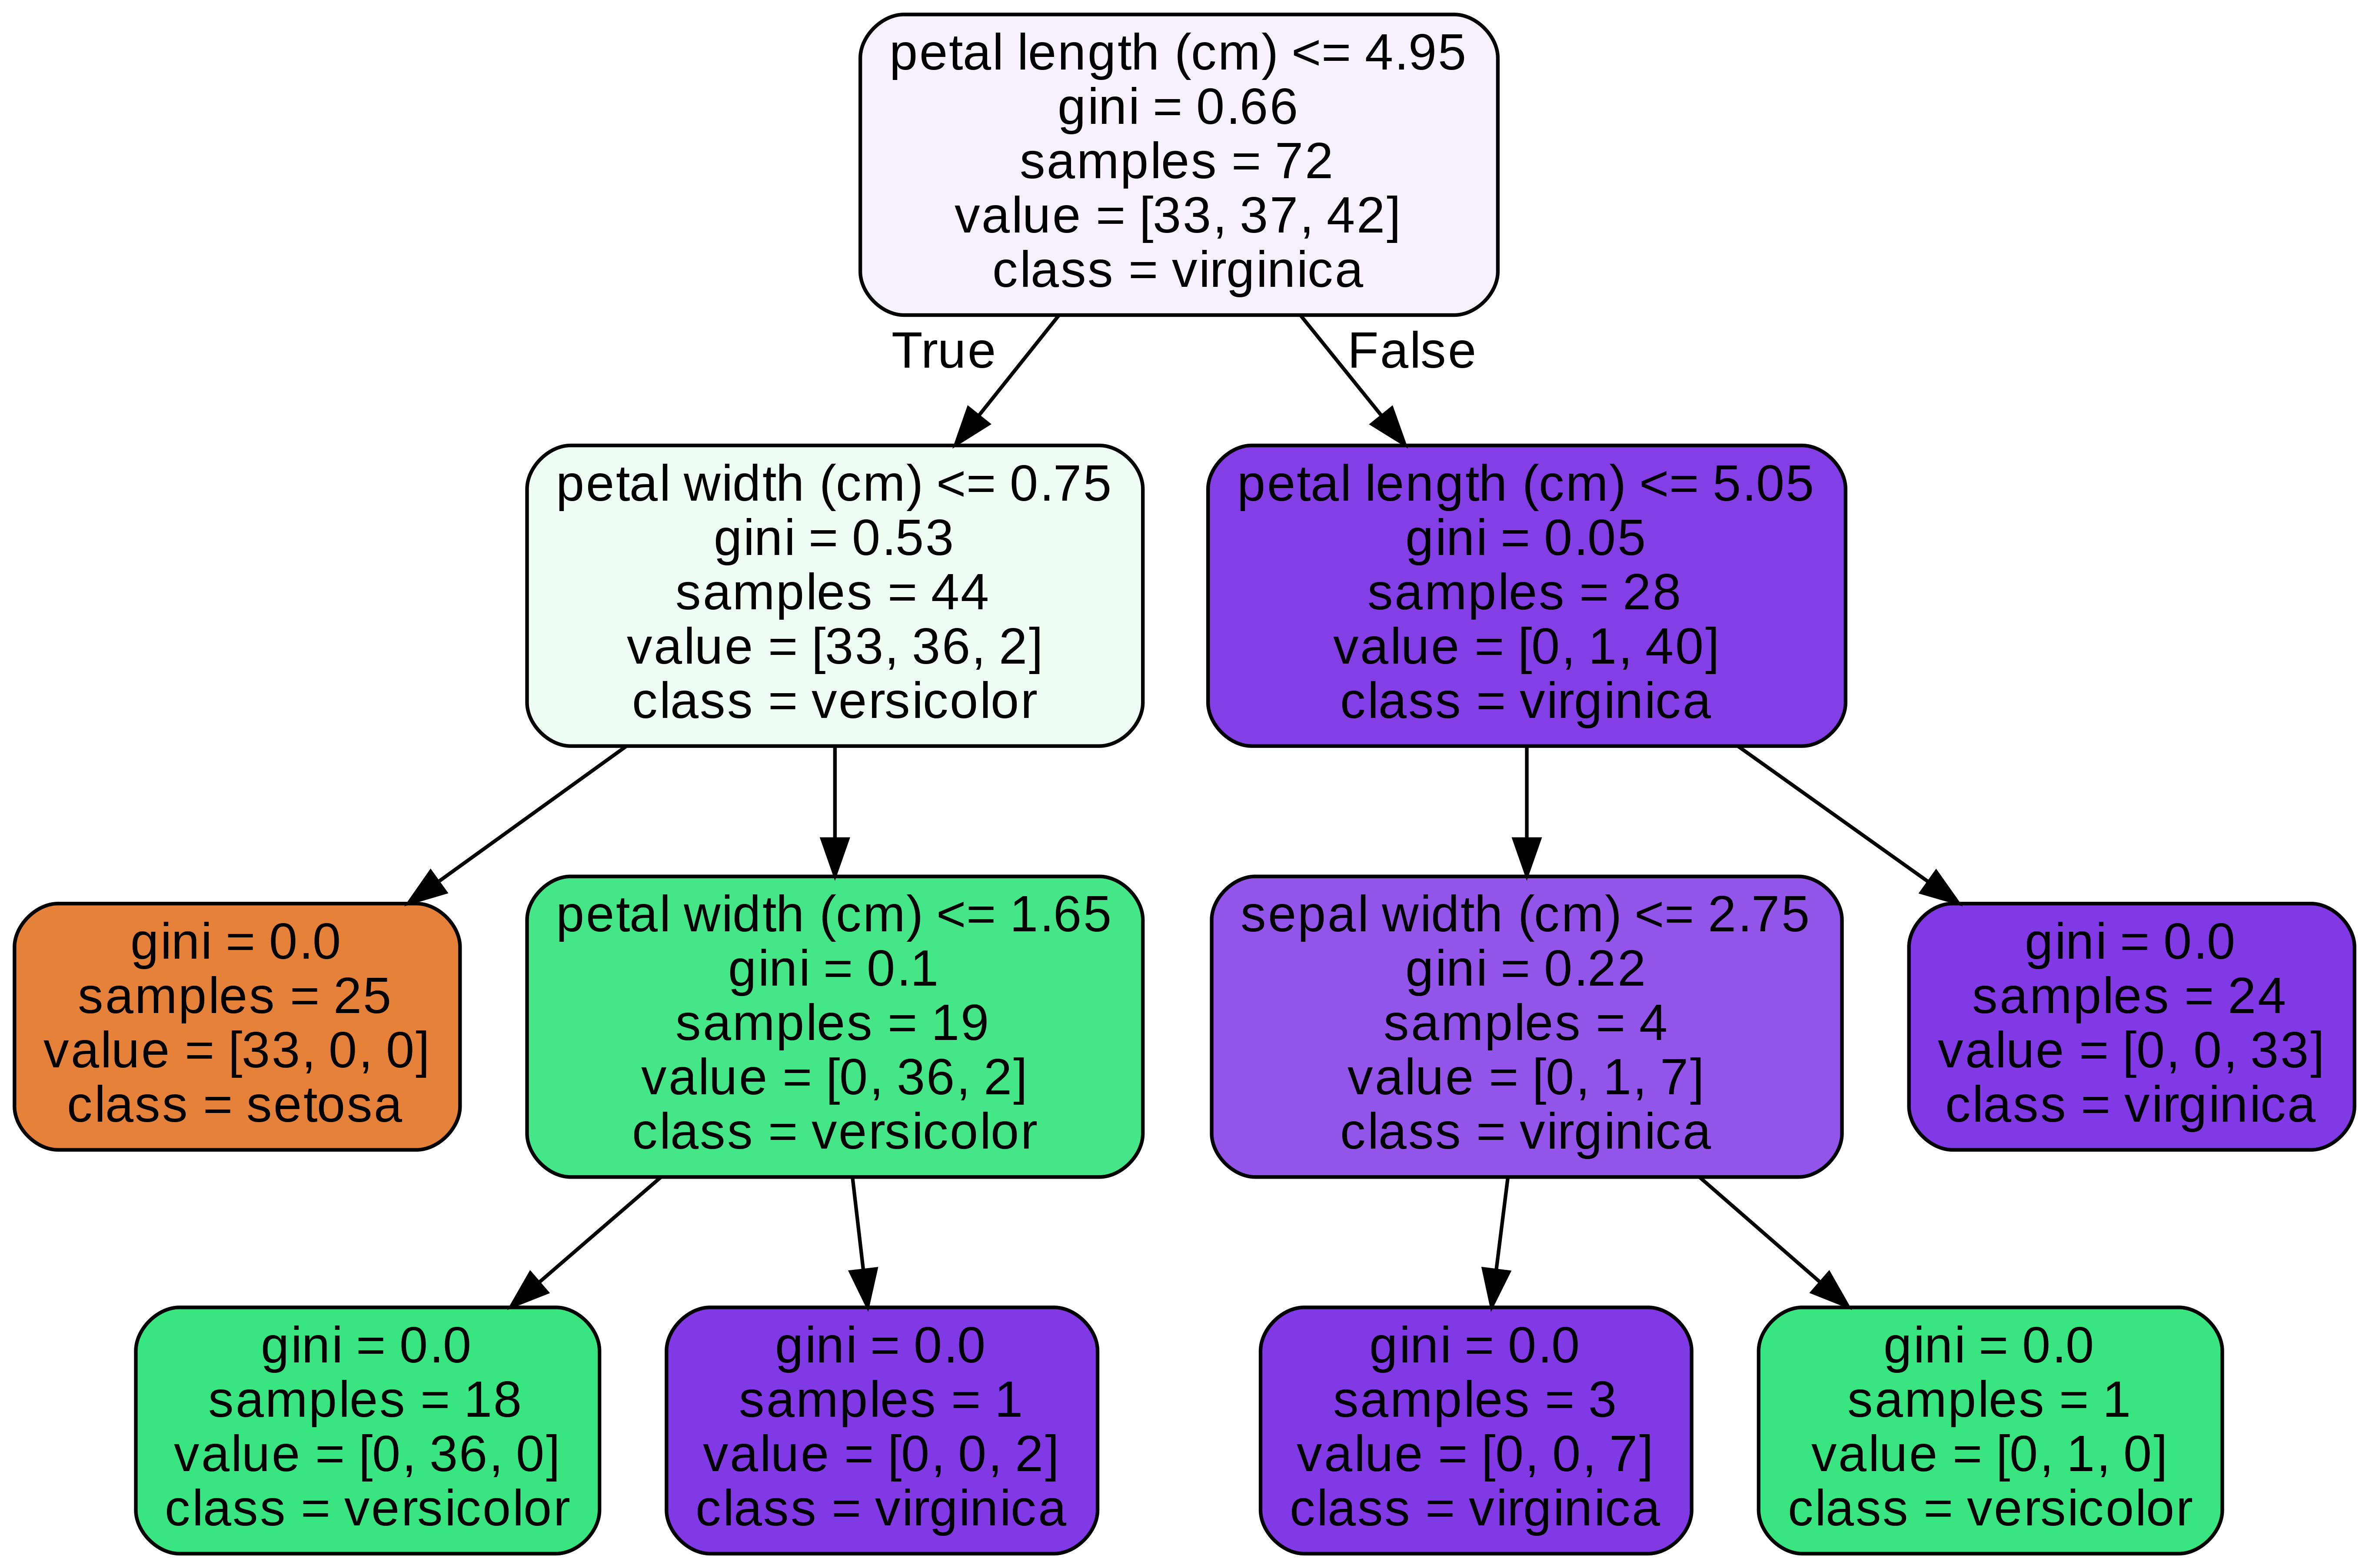

In [0]:
# Extract single tree
estimator = clf4.estimators_[5]

from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Exercicios
> Formem grupos de até 4 pessoas/alunos e treine pelo menos 3 algoritmos de ML nos dataframes Wine_White.csv e Wine_Red.csv, tendo como objetivo estimar o tipo do vinho, ou seja, estimar se o vinho é 'red' ou 'white'.